In [48]:
import data_preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
cities_short = ['ATL', 'BAL', 'BOS', 'CHAR', 'CHI', 'CLE', 'DEN', 'DET', 'HOU', 'IND', 'LV', 'LA', 'MIA', 'NASH', 'NO', 'NYC', 'PHI', 'SF', 'SEA', 'DC']
city_mapping = {
    'Atlanta city, Georgia': 'ATL',
    'Baltimore city, Maryland': 'BAL',
    'Boston city, Massachusetts': 'BOS',
    'Charlotte city, North Carolina': 'CHAR',
    'Chicago city, Illinois': 'CHI',
    'Cleveland city, Ohio': 'CLE',
    'Denver city, Colorado': 'DEN',
    'Detroit city, Michigan': 'DET',
    'Houston city, Texas': 'HOU',
    'Indianapolis city (balance), Indiana': 'IND',
    'Las Vegas city, Nevada': 'LV',
    'Los Angeles city, California': 'LA',
    'Miami city, Florida': 'MIA',
    'Nashville-Davidson metropolitan government (balance), Tennessee': 'NASH',
    'New Orleans city, Louisiana': 'NO',
    'New York city, New York': 'NYC',
    'Philadelphia city, Pennsylvania': 'PHI',
    'San Francisco city, California': 'SF',
    'Seattle city, Washington': 'SEA',
    'Washington city, District of Columbia': 'DC'
}

In [50]:
NSES = data_preprocessing.get_NSES()
data = data_preprocessing.get_full_data()
data = pd.merge(data, NSES, on='NAME')
data['NAME_SHORT'] = data['NAME'].map(city_mapping)

In [51]:
data

,GEO_ID,NAME,MEDIAN_HOUSEHOLD_INCOME,DEGREE_HOLDERS,LESS_HIGH_SCHOOL,HIGH_SCHOOL_GRADUATE,"MANAGEMENT, BUSINESS, SCIENCE, ARTS",SERVICE,SALES AND OFFICE,"NATURAL RESOURCES, CONSTRUCTION, MAINTENANCE",...,WHITE,AFRICAN_AMERICAN,AMERICAN_INDIAN_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_OTHER_PACIFIC_ISLANDER,HISPANIC_LATINO,CASES,RATIO_BLACK_TO_WHITE,NSES,NAME_SHORT
0,1600000US0644000,"Los Angeles city, California",65290.0,0.323029,0.078376,0.598595,0.400646,0.201728,0.203687,0.074027,...,0.413144,0.074101,0.006106,0.099455,0.001346,0.405848,11.097720,0.179360,20.250978,LA
1,1600000US0667000,"San Francisco city, California",119136.0,0.435222,0.033127,0.531651,0.590945,0.148944,0.175552,0.028813,...,0.447221,0.051197,0.004330,0.342232,0.003622,0.151398,4.196613,0.114478,22.693296,SF
2,1600000US0820000,"Denver city, Colorado",72661.0,0.388416,0.035114,0.576471,0.496299,0.154982,0.195602,0.072546,...,0.625426,0.079508,0.006712,0.031289,0.001399,0.255665,8.565993,0.127126,22.013448,DEN
3,1600000US1150000,"Washington city, District of Columbia",90842.0,0.409950,0.025466,0.564583,0.654872,0.135844,0.145414,0.026610,...,0.402411,0.444738,0.003403,0.040145,0.000458,0.108844,10.264310,1.105183,20.717693,DC
4,1600000US1245000,"Miami city, Florida",44268.0,0.283074,0.079288,0.637638,0.334037,0.224957,0.219711,0.119317,...,0.420594,0.102795,0.001917,0.008391,0.000258,0.466044,24.985070,0.244405,19.431745,MIA
5,1600000US1304000,"Atlanta city, Georgia",64179.0,0.394564,0.027968,0.577469,0.557569,0.138108,0.198531,0.024382,...,0.402755,0.496045,0.003780,0.047783,0.000404,0.049232,9.351569,1.231628,19.999122,ATL
6,1600000US1714000,"Chicago city, Illinois",62097.0,0.338717,0.048918,0.612365,0.442182,0.185896,0.197962,0.049762,...,0.423150,0.259036,0.003036,0.060659,0.000319,0.253800,9.904724,0.612160,19.932216,CHI
7,1600000US1836003,"Indianapolis city (balance), Indiana",50813.0,0.282592,0.051689,0.665718,0.371962,0.165425,0.216416,0.068677,...,0.576392,0.283161,0.002106,0.036368,0.000169,0.101804,8.873157,0.491265,20.243290,IND
8,1600000US2255000,"New Orleans city, Louisiana",43258.0,0.313545,0.044282,0.642173,0.436815,0.214633,0.203302,0.060187,...,0.330105,0.585243,0.001826,0.028557,0.000078,0.054190,17.650193,1.772900,18.850780,NO
9,1600000US2404000,"Baltimore city, Maryland",52164.0,0.277346,0.053937,0.668717,0.443312,0.196910,0.195254,0.050418,...,0.296541,0.621262,0.003073,0.024774,0.000297,0.054053,9.785586,2.095030,19.155729,BAL


# Helper Functions

In [52]:
def normalize(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

In [53]:
def standardize(data):
    mean_per_column = data.mean(axis=0, numeric_only = True)
    std_per_column = data.std(axis=0, numeric_only = True)
    return (data - mean_per_column)/std_per_column

In [54]:
def scatter(data, feature1, feature2, feature3, ball_size, scale):
    sorted_data = data.sort_values('NAME_SHORT')
    ax = plt.subplot(2, 5, scatter.counter + 1)
    scatter.counter += 1
    ax.scatter(sorted_data[feature1], sorted_data[feature2], s=normalize(sorted_data[[feature3]])*ball_size)
    for i, txt in enumerate(sorted_data['NAME_SHORT']):
        ax.annotate(txt, (sorted_data[feature1].iloc[i], sorted_data[feature2].iloc[i]))
    z = np.polyfit(sorted_data[feature1], sorted_data[feature2], 1)
    p = np.poly1d(z)
    ax.plot(sorted_data[feature1], p(sorted_data[feature1]), "r--")
    ax.set_xlabel(feature1, fontsize=16)
    ax.set_ylabel(feature2, fontsize=16)
    if scale == 'log':
        ax.set_xscale("log")


In [55]:
def stacked_bar_char(data, category):
    if category == 'Occupation':
        values = ['MANAGEMENT, BUSINESS, SCIENCE, ARTS',
                  'SERVICE',
                  'SALES AND OFFICE',
                  'NATURAL RESOURCES, CONSTRUCTION, MAINTENANCE',
                  'PRODUCTION, TRANSPORTATION, MATERIAL MOVING']
    elif category == 'Race':
        values = ['WHITE', 'AFRICAN_AMERICAN','AMERICAN_INDIAN_ALASKA_NATIVE', 'ASIAN',                       'NATIVE_HAWAIIAN_OTHER_PACIFIC_ISLANDER','HISPANIC_LATINO']
    elif category == 'Sex':
        values = ['MALE']
    elif category == 'Education':
        values = ['DEGREE_HOLDERS','LESS_HIGH_SCHOOL','HIGH_SCHOOL_GRADUATE']
    else:
        values = ['PERCENTAGE_INSURED', 'PERCENTAGE_UNINSURED']
    pivot_df = data.pivot_table(index='NAME_SHORT',
                              values=values)
    pivot_df.plot(kind='barh', stacked=True)
    plt.xlabel('Percentage')
    plt.ylabel('City')
    plt.title(category+' by City')
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

# EDA with initial features

### Insights on education, occupation, and race

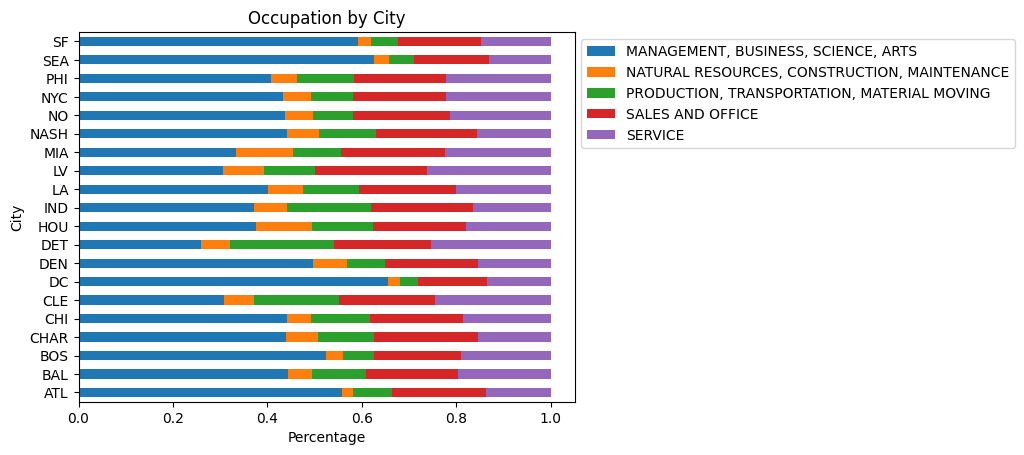

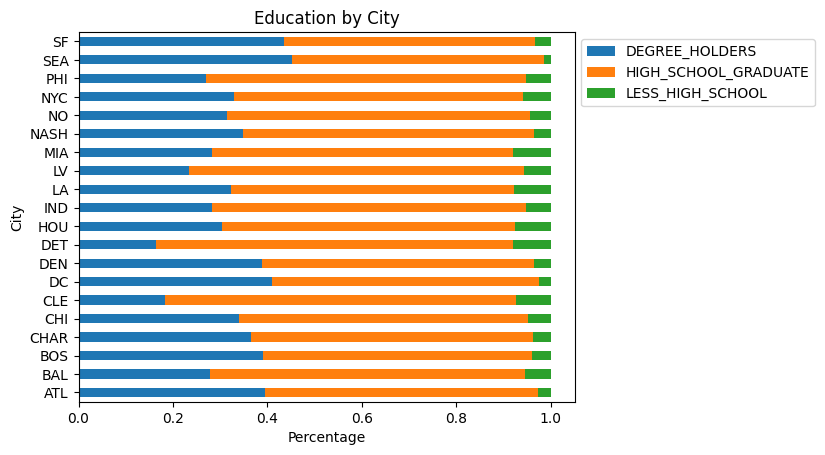

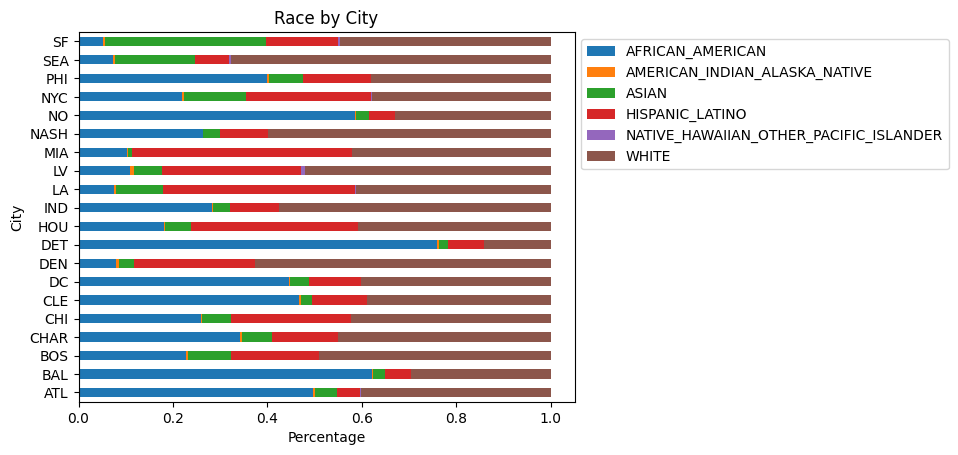

In [56]:
stacked_bar_char(data,'Occupation')
stacked_bar_char(data,'Education')
stacked_bar_char(data,'Race')

### Correlation matrix of initial features

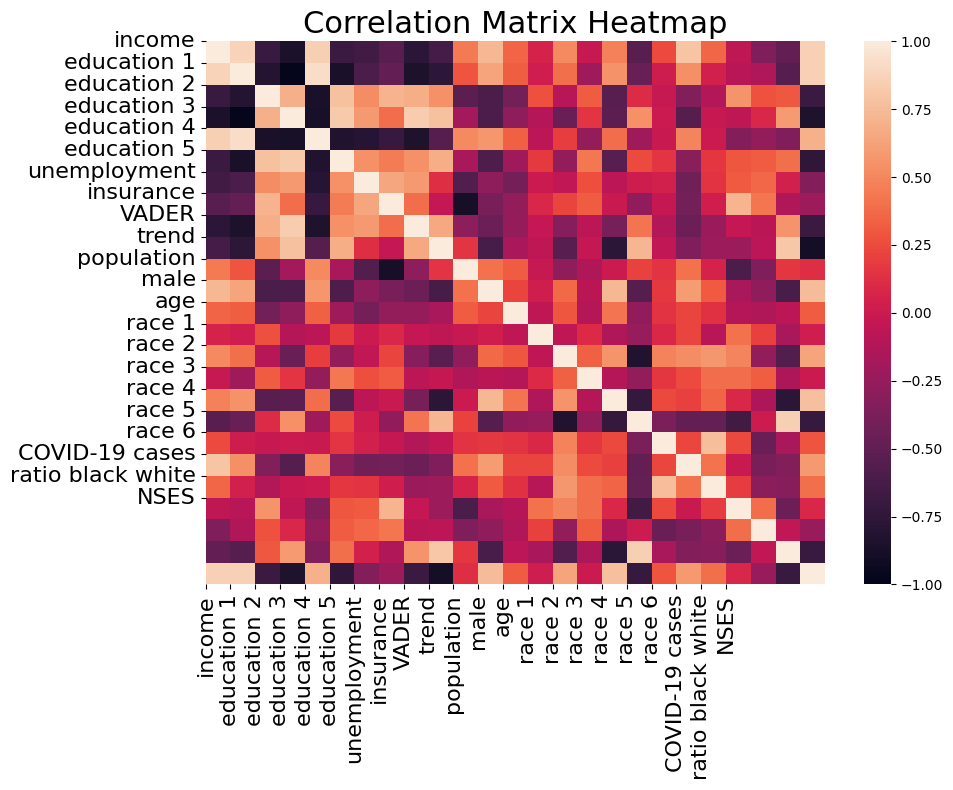

In [57]:
labels_initial = ['income', 'education 1', 'education 2', 'education 3', 'education 4', 'education 5', 'unemployment', 'insurance',
                  'VADER', 'trend', 'population', 'male', 'age', 'race 1', 'race 2', 'race 3', 'race 4', 'race 5', 'race 6',
                  'COVID-19 cases', 'ratio black white', 'NSES']
correlation_data_initial = data.drop(['GEO_ID', 'NAME', 'NAME_SHORT'], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data_initial.corr(), vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap", fontsize=22)
plt.xticks(range(len(labels_initial)), labels_initial, rotation=90, fontsize=16)
plt.yticks(range(len(labels_initial)), labels_initial, fontsize=16)
plt.tight_layout()
plt.savefig("correlation_heatmap_initial.png", dpi=300)
plt.show()

# EDA with final features

In [58]:
final_data = data.drop(['MANAGEMENT, BUSINESS, SCIENCE, ARTS','SERVICE','SALES AND OFFICE','NATURAL RESOURCES, CONSTRUCTION, MAINTENANCE',
                  'PRODUCTION, TRANSPORTATION, MATERIAL MOVING','WHITE', 'AFRICAN_AMERICAN','AMERICAN_INDIAN_ALASKA_NATIVE',
                  'ASIAN','NATIVE_HAWAIIAN_OTHER_PACIFIC_ISLANDER','HISPANIC_LATINO','LESS_HIGH_SCHOOL','HIGH_SCHOOL_GRADUATE'], axis=1)
labels_final = {'MEDIAN_HOUSEHOLD_INCOME':'income', 'DEGREE_HOLDERS':'degree holders', 'UNEMPLOYMENT_RATE':'unemployment',
                'PERCENTAGE_INSURED':'insurance','VADER_SCORE':'VADER','TOTAL_POPULATION':'population','MALE':'male',
                'MEDIAN_AGE':'age','CASES':'COVID-19 cases','RATIO_BLACK_TO_WHITE':'ratio black white','NSES':'NSES'}
final_data = final_data.rename(columns=labels_final)

### Distribution of each individual variable

In [59]:
distribution_data = final_data.drop(['GEO_ID','NAME','NAME_SHORT'],axis=1)

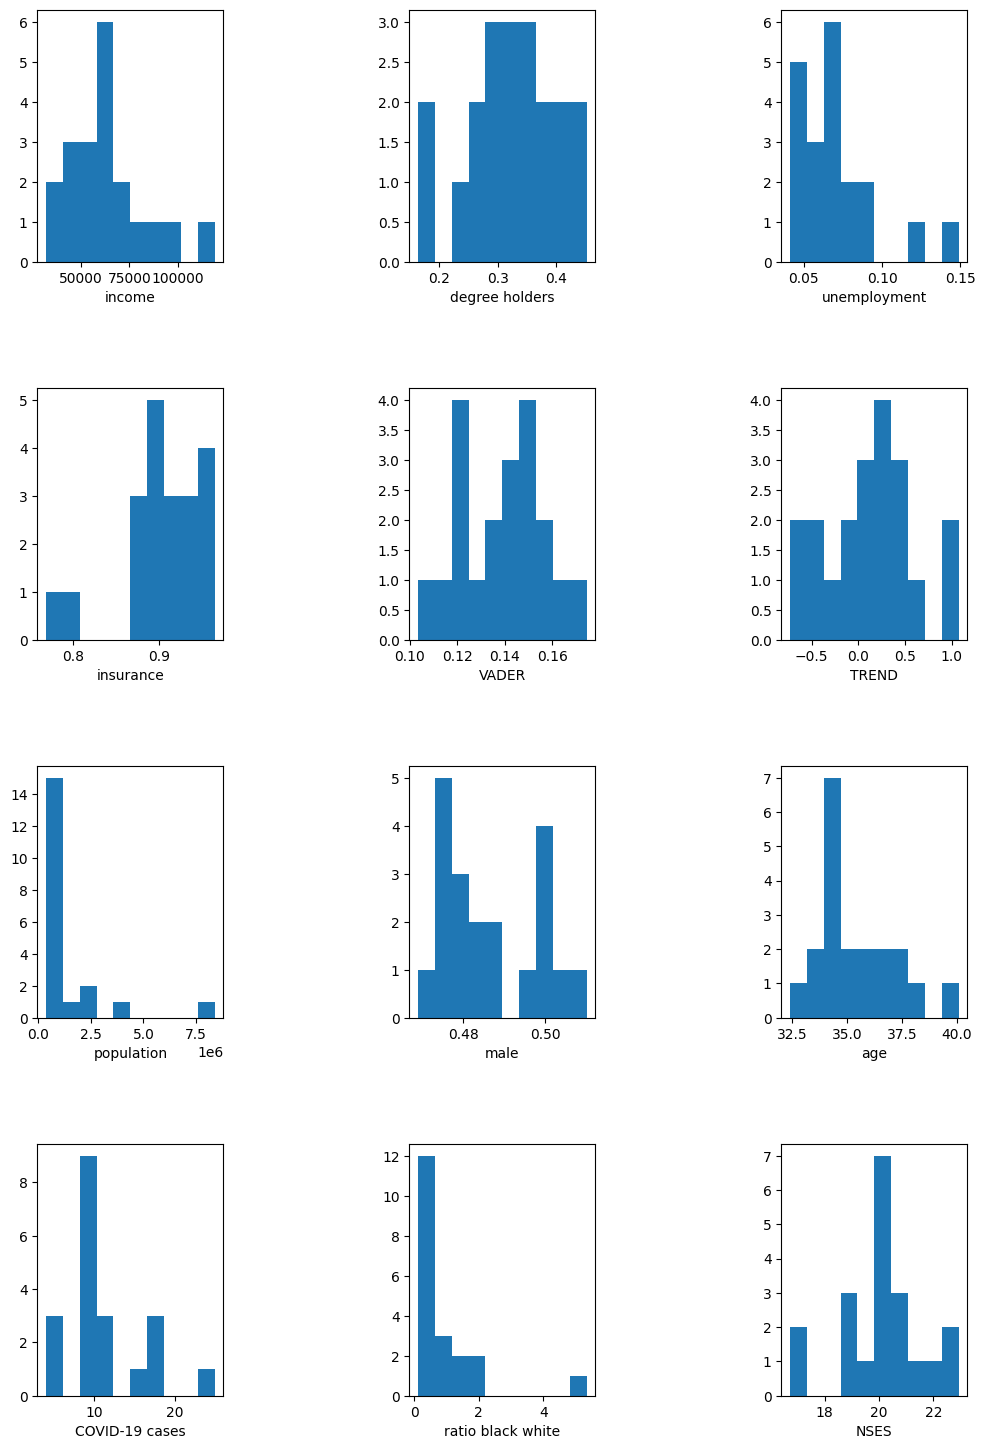

In [60]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 18))
axs = axs.ravel()
for i in range(distribution_data.shape[1]):
    row = i // 3
    col = i % 3
    column_name = distribution_data.columns[i]
    axs[i].hist(distribution_data[column_name])
    axs[i].set_xlabel(column_name)

fig.subplots_adjust(hspace=0.5, wspace=1)
plt.show()

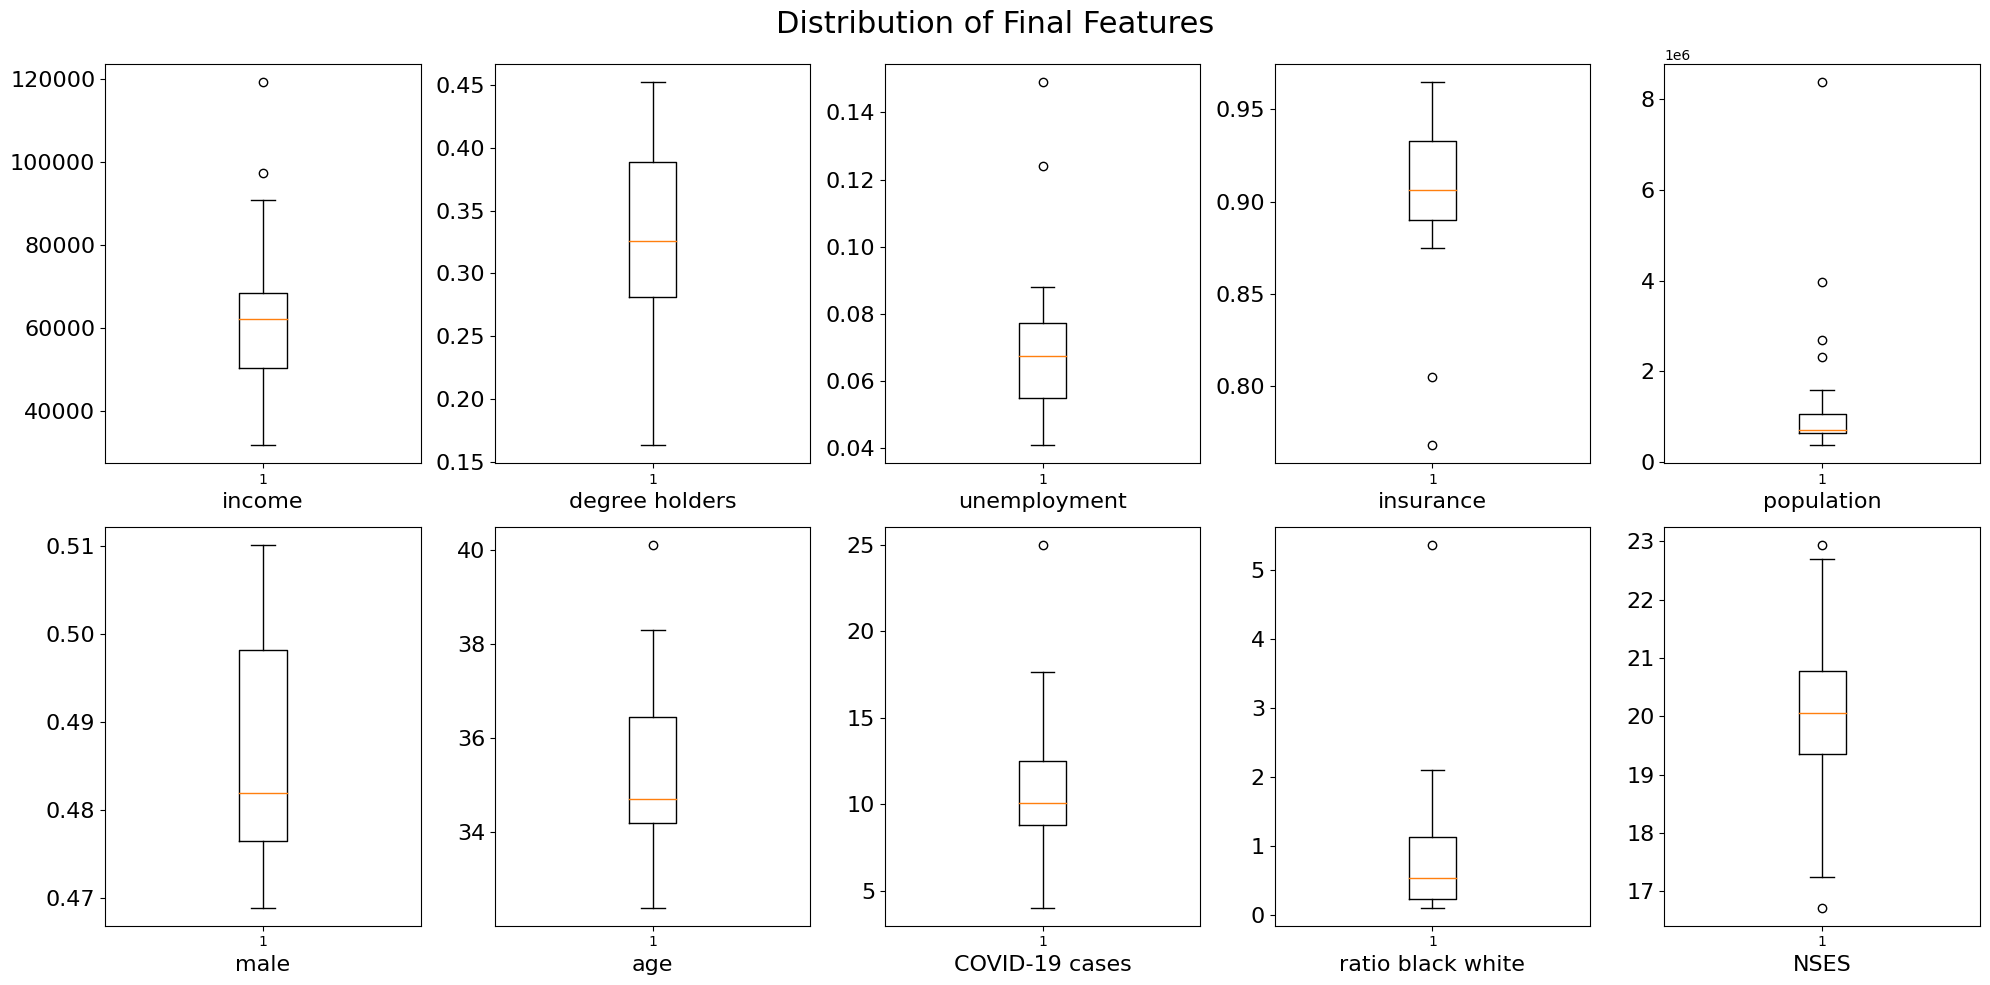

In [61]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.ravel()
distribution_data = distribution_data.drop(['VADER', 'TREND'], axis=1)
for i in range(distribution_data.shape[1]):
    row = i // 3
    col = i % 3
    column_name = distribution_data.columns[i]
    axs[i].boxplot(distribution_data[column_name])
    axs[i].set_xlabel(column_name, fontsize=16)
    axs[i].tick_params(axis='y', labelsize=16)
plt.suptitle("Distribution of Final Features", fontsize=22)
plt.tight_layout()
plt.savefig("distribution.png", dpi=300, transparent=True)
plt.show()

# Relationship between features and target variable

### Correlation matrix of final features

In [62]:
visualization_data = final_data.copy()

C:\Users\lucac\AppData\Local\Temp\ipykernel_14372\3188926772.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(visualization_data.corr())


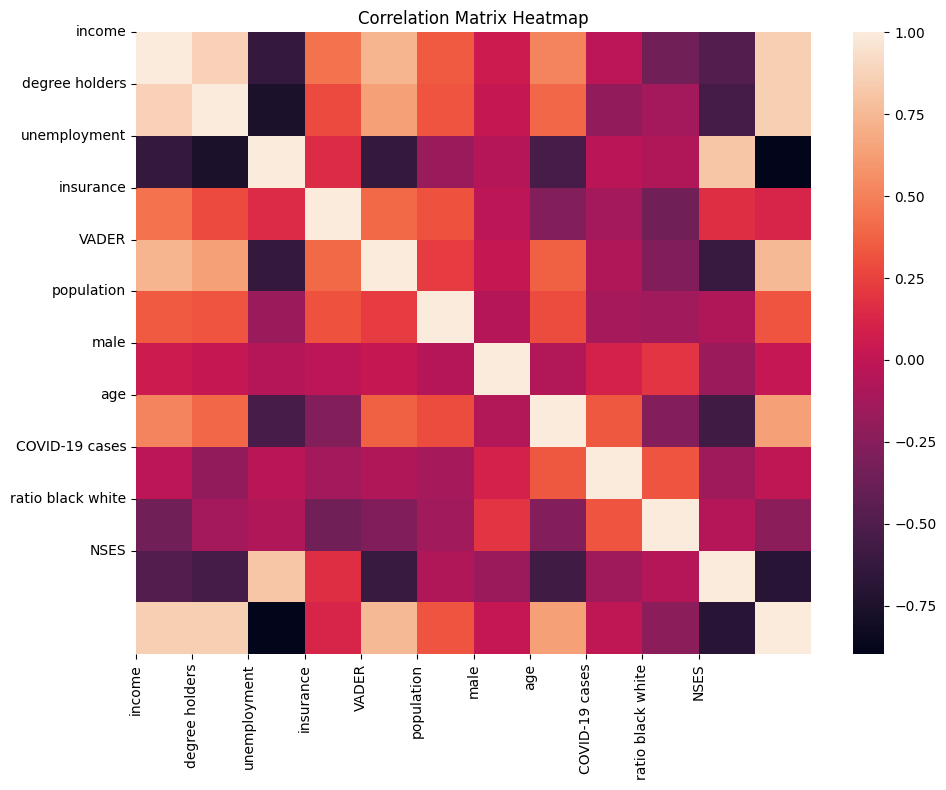

In [63]:
labels_final = ['income', 'degree holders', 'unemployment','insurance', 'VADER', 'population', 'male', 'age',
                'COVID-19 cases', 'ratio black white','NSES']
plt.figure(figsize=(10, 8))
sns.heatmap(visualization_data.corr())
plt.title("Correlation Matrix Heatmap")
plt.xticks(range(len(labels_final)), labels_final, rotation=90)
plt.yticks(range(len(labels_final)), labels_final)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)

### Scatter plots of final features and target variable

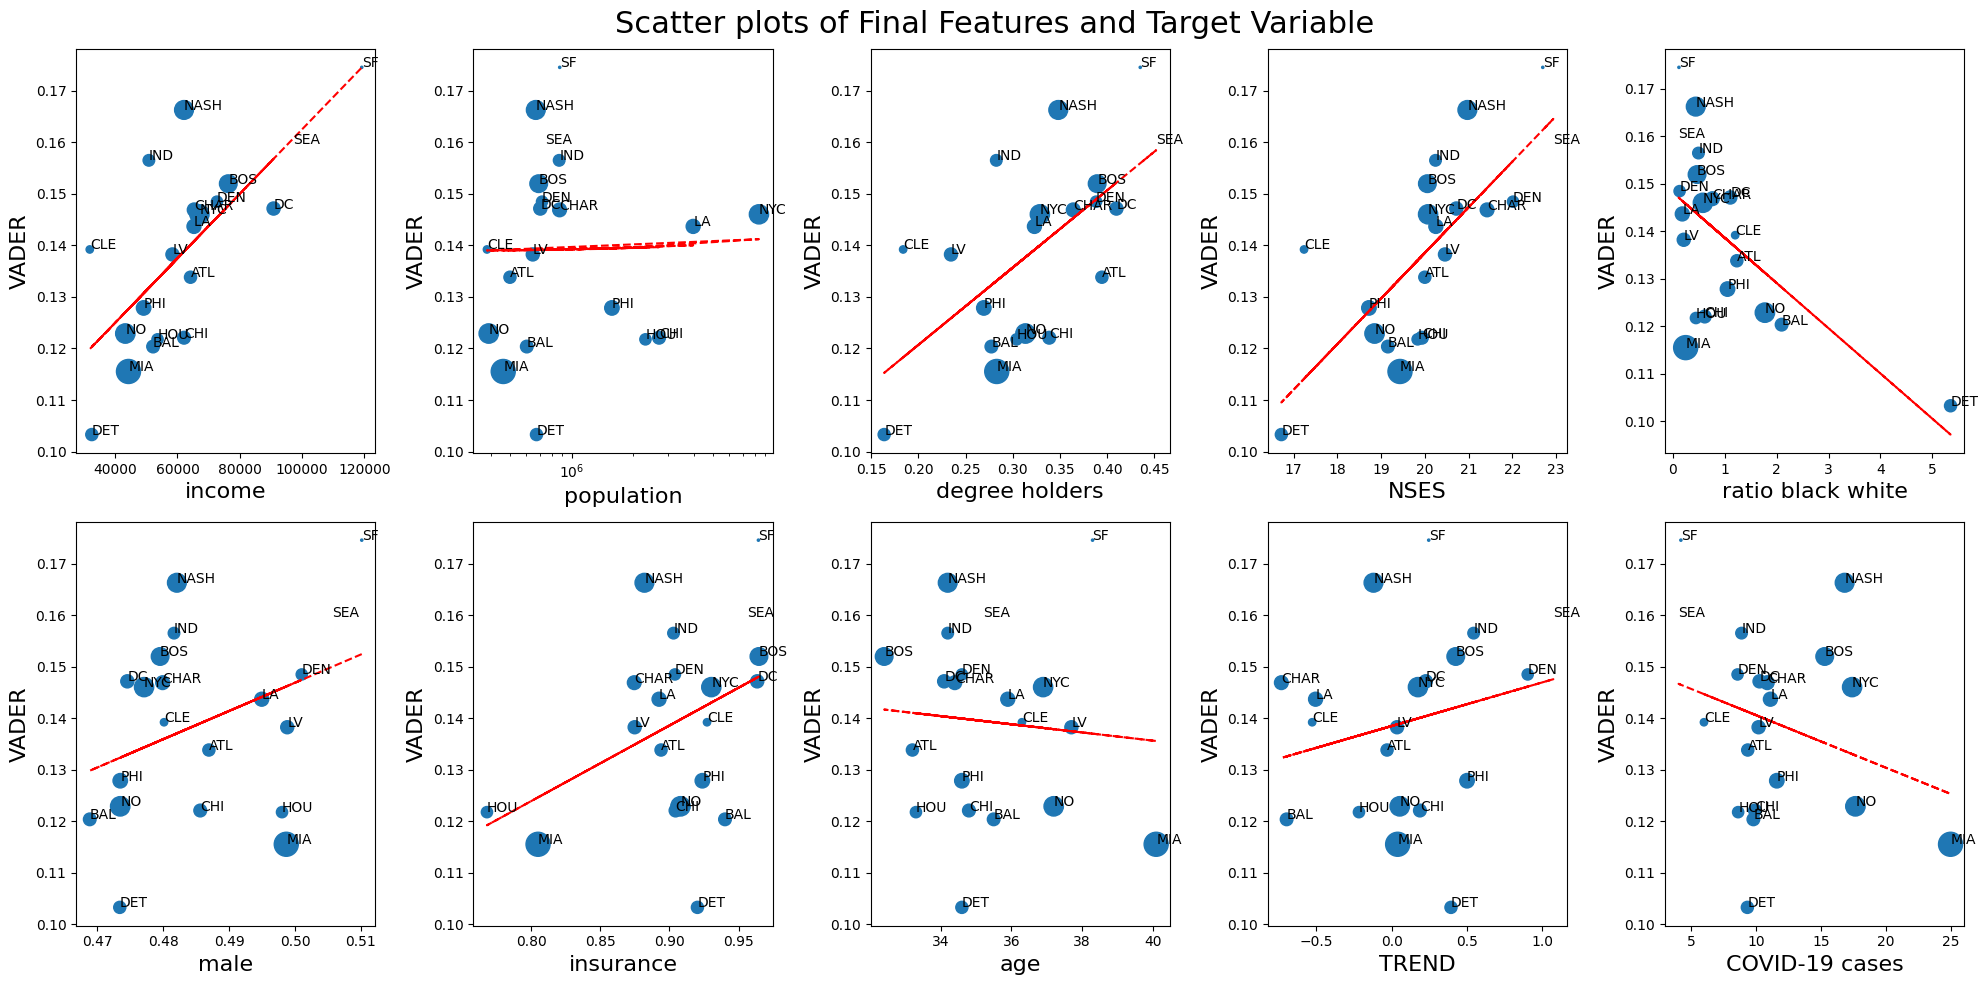

In [64]:
scatter.counter = 0
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
scatter(visualization_data, 'income', 'VADER', 'COVID-19 cases', 300, None)
scatter(visualization_data, 'population', 'VADER', 'COVID-19 cases', 300, 'log')
scatter(visualization_data, 'degree holders', 'VADER', 'COVID-19 cases', 300, None)
scatter(visualization_data, 'NSES', 'VADER', 'COVID-19 cases', 300, None)
scatter(visualization_data, 'ratio black white', 'VADER', 'COVID-19 cases', 300, None)
scatter(visualization_data, 'male', 'VADER', 'COVID-19 cases', 300, None)
scatter(visualization_data, 'insurance', 'VADER', 'COVID-19 cases', 300, None)
scatter(visualization_data, 'age', 'VADER', 'COVID-19 cases', 300, None)
scatter(visualization_data, 'TREND', 'VADER', 'COVID-19 cases', 300, None)
scatter(visualization_data, 'COVID-19 cases', 'VADER', 'COVID-19 cases', 300, None)
plt.suptitle("Scatter plots of Final Features and Target Variable", fontsize=22)
plt.tight_layout()
plt.savefig("scatter.png", dpi=300, transparent=True)
plt.show()